In [1]:
import os
import sys
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import umap
import phenograph

sys.path.append('..')
import catrace
import catrace.scale as catscale
import catrace.process_time_trace as ptt
import catrace.exp_collection as ecl
import catrace.cluster as caclust
import dataset_param as dtpar

In [2]:
region = 'OB'
separate_region = False
if separate_region:
    all_dfovf_select = pd.read_pickle(os.path.join(dtpar.db_dir, 'all_dfovf_select.pkl'))
    all_dfovf_select_rg = all_dfovf_select.xs(region, level='region', axis=1)
    all_dfovf_select_rg.to_pickle(os.path.join(dtpar.db_dir, f'all_dfovf_select_{region}.pkl'))

In [3]:
compute_response = False
if compute_response:
    all_dfovf_select_rg = pd.read_pickle(os.path.join(dtpar.db_dir, f'all_dfovf_select_{region}.pkl'))
    if region =='OB':
        time_window = [5.5,11]
    else:
        time_window = [5,7]   
    frame_rate = 30/4
    all_response = ptt.mean_pattern_in_time_window(all_dfovf_select_rg, time_window, frame_rate)
    all_response.to_pickle(os.path.join(dtpar.db_dir, f'all_response_select_{region}.pkl'))
    all_response

In [5]:
all_response = pd.read_pickle(os.path.join(dtpar.db_dir, 'all_response_select_{}.pkl'.format(region)))
all_response

fish_id     2021-02-05-DpOBEM-JH9                                          \
cond                      phe-arg                                           
plane                           0                                           
neuron                        5         8         11        12        16    
odor  trial                                                                 
phe   0                  1.035353 -0.158235  0.517368  0.535052  1.077615   
      1                  1.519326  0.042216  1.124763  0.777386  0.882617   
      2                  0.935915 -0.109375  0.478196  0.773466  0.924358   
trp   0                  1.451576  0.129413  0.062358  0.949955  0.987112   
      1                  1.327724  0.197734  0.275346  1.542844  0.801086   
      2                  1.519535 -0.068069  0.127115  0.861231  0.755766   
arg   0                  0.139956  0.008874  0.593979  0.699906  0.422489   
      1                  0.796280 -0.022327  0.494700  0.955864  0.586063   
      2                  0.703085 -0.060854  0.277437  0.636560  0.463131   
tdca  0                  1.529372 -0.008026  0.239644  0.582326  0.318925   
      1                  1.252359 -0.061348  0.186779  0.649676  0.328053   
      2                  0.706713 -0.191767  0.314861  0.692043  0.390844   
tca   0                  1.659971 -0.062198  0.431203  1.018826  0.553216   
      1                  1.746201  0.001599  0.325485  1.004456  0.226031   
      2                  1.592593 -0.034735  0.322116  1.090644  0.351608   
gca   0                  0.969537 -0.006481  0.057238  0.753401  0.406055   
      1                  1.451843  0.015437  0.172944  0.803320  0.540863   
      2                  1.196359 -0.135864  0.215826  0.949224  0.434510   
acsf  0                  0.096560 -0.150766  0.029667  0.795276  0.168868   
      1                  0.158054 -0.000516  0.111399  0.480016  0.289669   
      2                  0.480067 -0.089690  0.164796  0.723143  0.312986   
spont 0                 -0.072187 -0.052786 -0.020274 -0.042769  0.040924   
      1                 -0.216010  0.028993 -0.051463  0.015113 -0.077513   
      2                  0.096402  0.116403  0.110916 -0.003756  0.088679   

fish_id                                                        ...  \
cond                                                           ...   
plane                                                          ...   
neuron            17        18        28        29        31   ...   
odor  trial                                                    ...   
phe   0      0.569058  0.798220  3.009268  1.076121  0.817197  ...   
      1      0.920603  1.061824  3.699299  1.587751  1.128779  ...   
      2      1.143073  0.673244  3.289382  1.305418  0.784521  ...   
trp   0      0.177416  0.264648  0.733281  0.288468  1.367740  ...   
      1      0.128383  0.443849  0.195701  0.189553  1.449318  ...   
      2      0.246339  0.440364  0.406284  0.317107  1.442119  ...   
arg   0      0.257195  1.691062  0.204408  0.378741  0.142516  ...   
      1      0.249119  2.311969  0.223565  0.423255  0.653620  ...   
      2      0.319463  2.006010  0.145223  0.346636  0.285462  ...   
tdca  0      1.262503  1.288687  0.196096  0.354373  0.456594  ...   
      1      0.912742  1.167028  0.250351  0.443371  0.675546  ...   
      2      0.826192  1.030630  0.842657  0.521660  0.404732  ...   
tca   0      0.298083  0.488658 -0.025790  0.374113  0.779978  ...   
      1      0.556833  0.738599  0.198623  0.677477  0.592042  ...   
      2      0.490522  0.579231  0.397452  0.350980  0.703294  ...   
gca   0      1.701060  1.066419  2.602186  0.184564  0.714760  ...   
      1      2.183134  1.209361  2.750276  0.092626  0.860110  ...   
      2      1.617428  0.513949  2.205598  0.129973  0.530551  ...   
acsf  0      0.235409 -0.116814  0.059574  0.099619  0.106155  ...   
      1      0.041841  0.091141  0.065120  0.078293  0.146678  ...   
      2      0.2

In [10]:
compute_cluster_df = True
if compute_cluster_df:
    all_response = pd.read_pickle(os.path.join(dtpar.db_dir, 'all_response_select_{}.pkl'.format(region)))
    #all_response = pd.read_pickle('../../../results/JH_analysis/all_response_select_{}.pkl'.format(region))
    H = catscale.standard_scale(all_response)
    data = H.transpose()
    fish_id = data.index.get_level_values('fish_id')
    training_dict = dict(dtpar.exp_list)
    train_cond= fish_id.map(training_dict)
    cond_list = dtpar.cond_list
    cond_order = {k: v for v, k in enumerate(cond_list)}
    cond_idx = train_cond.map(cond_order)

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [5]:
all_response

NameError: name 'all_response' is not defined

In [11]:
if compute_cluster_df:
    k=50
    communities_raw, graph, Q = phenograph.cluster(data, k=k)
    communities_raw = communities_raw + 1 # so that cluster id starts from 1

Finding 50 nearest neighbors using minkowski metric and 'auto' algorithm


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Neighbors computed in 19.856707334518433 seconds
Jaccard graph constructed in 3.9744601249694824 seconds
Wrote graph to binary file in 0.7860062122344971 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.735356
After 4 runs, maximum modularity is Q = 0.739714
Louvain completed 24 runs in 33.49269723892212 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 58.37670278549194 seconds


In [14]:
xcs = caclust.get_cluster_df(H, communities_raw)
xcs

(phe, 0)  (phe, 1)  (phe, 2)  \
fish_id                cond    plane neuron                                 
2021-02-05-DpOBEM-JH9  phe-arg 0     5       0.190423  0.988375  0.026474   
2021-09-03-DpOBEM-JH18 arg-phe 1     230     0.967142  0.754569 -0.244397   
                                     191     0.314269 -0.039330 -0.719823   
                                     180    -0.212489 -0.671751 -0.103742   
                                     167     0.039149 -0.240148 -0.384361   
...                                               ...       ...       ...   
2021-07-30-DpOBEM-JH17 arg-phe 2     56     -0.313451 -0.400034 -0.766353   
2021-03-19-DpOBEM-JH10 phe-arg 2     348    -0.208079  0.591760 -0.011925   
2021-07-15-DpOBEM-N2   naive   3     321    -0.241771  0.019757 -0.092179   
2021-11-10-DpOBEM-JH23 phe-trp 0     347     2.133142 -0.240223 -1.154887   
2021-07-30-DpOBEM-JH17 arg-phe 2     27      1.265169 -0.743676 -0.894765   

                                             (trp, 0)  (trp, 1)  (trp, 2)  \
fish_id                cond    plane neuron                                 
2021-02-05-DpOBEM-JH9  phe-arg 0     5       0.876671  0.672470  0.988720   
2021-09-03-DpOBEM-JH18 arg-phe 1     230     0.283597  0.109657  0.376483   
                                     191     0.497345 -0.542110 -0.146949   
                                     180     1.478018 -0.473573 -0.118882   
                                     167     0.108096 -0.084053 -0.419670   
...                                               ...       ...       ...   
2021-07-30-DpOBEM-JH17 arg-phe 2     56      1.540634 -0.434506 -0.154277   
2021-03-19-DpOBEM-JH10 phe-arg 2     348     2.905821  0.122022  0.798854   
2021-07-15-DpOBEM-N2   naive   3     321     0.077474  0.343177 -0.046104   
2021-11-10-DpOBEM-JH23 phe-trp 0     347    -0.069293  0.926164  0.268368   
2021-07-30-DpOBEM-JH17 arg-phe 2     27      0.784878  1.005451 -0.616703   

                                             (arg, 0)  (arg, 1)  (arg, 2)  \
fish_id                cond    plane neuron                                 
2021-02-05-DpOBEM-JH9  phe-arg 0     5      -1.285865 -0.203749 -0.357404   
2021-09-03-DpOBEM-JH18 arg-phe 1     230     0.317200  0.528728  0.318081   
                                     191    -0.259279 -0.140254 -0.188791   
                                     180     0.445349  0.746626  0.922459   
                                     167    -0.333162 -0.551194 -0.318532   
...                                               ...       ...       ...   
2021-07-30-DpOBEM-JH17 arg-phe 2     56      0.770370 -0.034598  1.221905   
2021-03-19-DpOBEM-JH10 phe-arg 2     348     1.817902  0.615406 -0.795819   
2021-07-15-DpOBEM-N2   naive   3     321     0.123790 -0.319888  0.080259   
2021-11-10-DpOBEM-JH23 phe-trp 0     347    -0.598686 -0.341473  0.121547   
2021-07-30-DpOBEM-JH17 arg-phe 2     27      0.459493 -0.758218  0.843303   

                                             (tdca, 0)  ...  (gca, 0)  \
fish_id                cond    plane neuron             ...             
2021-02-05-DpOBEM-JH9  phe-arg 0     5        1.004938  ...  0.081908   
2021-09-03-DpOBEM-JH18 arg-phe 1     230      2.016907  ...  0.248790   
                                     191      2.120179  ...  1.045399   
                                     180      1.952795  ...  0.146792   
                                     167      2.357167  ...  0.354937   
...                                                ...  ...       ...   
2021-07-30-DpOBEM-JH17 arg-phe 2     56      -3.111730  ...  0.286872   
2021-03-19-DpOBEM-JH10 phe-arg 2     348     -0.686691  ...  0.940319   
2021-07-15-DpOBEM-N2   naive   3     321     -4.214724  ...  1.721954   
2021-11-10-DpOBEM-JH23 phe-trp 0     347      0.190619  ... -0.416924   
2021-07-30-DpOBEM-JH17 arg-phe 2     27      -2.731311  ...  0.786198   

                                             (gca, 1)  (gca, 2)  (acsf, 0)  \
fish_id    

/home/hubo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


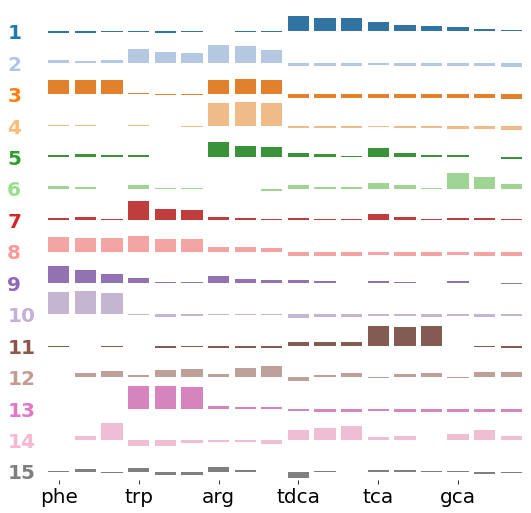

In [16]:
fig_dir = dtpar.fig_dir
if compute_cluster_df:
    importlib.reload(dtpar)
    %matplotlib inline
    cluster_cmap = 'tab20'
    cluster_mean_df_raw = caclust.get_cluster_mean_df(xcs)
    fig = caclust.plot_cluster_tuning(cluster_mean_df_raw, cmap=cluster_cmap)
    fig.savefig(os.path.join(fig_dir, "cluster_mean.svg"))

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

6_arg-phe vs. 6_phe-trp: t-test independent samples, P_val:4.066e-01 t=-8.630e-01
7_arg-phe vs. 7_phe-trp: t-test independent samples, P_val:6.676e-01 t=4.412e-01
8_arg-phe vs. 8_phe-trp: t-test independent samples, P_val:2.317e-02 t=-2.636e+00
9_arg-phe vs. 9_phe-trp: t-test independent samples, P_val:8.129e-01 t=-2.425e-01
10_arg-phe vs. 10_phe-trp: t-test independent samples, P_val:6.433e-01 t=-4.762e-01
11_arg-phe vs. 11_phe-trp: t-test independent samples, P_val:1.947e-01 t=-1.381e+00
12_arg-phe vs. 12_phe-trp: t-test independent samples, P_val:5.454e-01 t=6.239e-01
13_arg-phe vs. 13_phe-trp: t-test independent samples, P_val:3.878e-01 t=-8.992e-01
14_arg-phe vs. 14_phe-trp: t-test independent samples, P_val:4.387e-01 t=8.149e-01
15_arg-phe vs. 15_phe-trp: t-test independent samples, P_val:2.340e-01 t=-

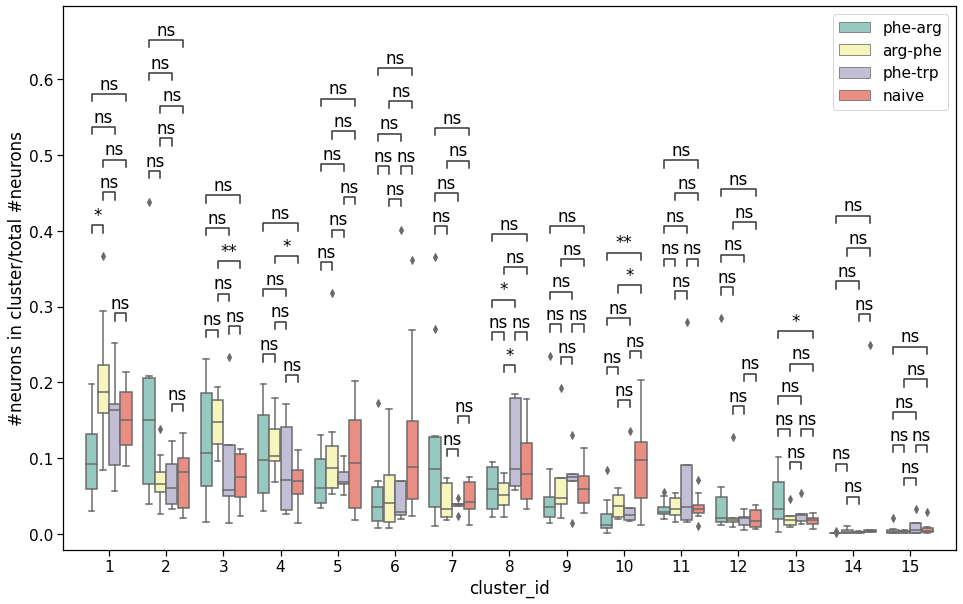

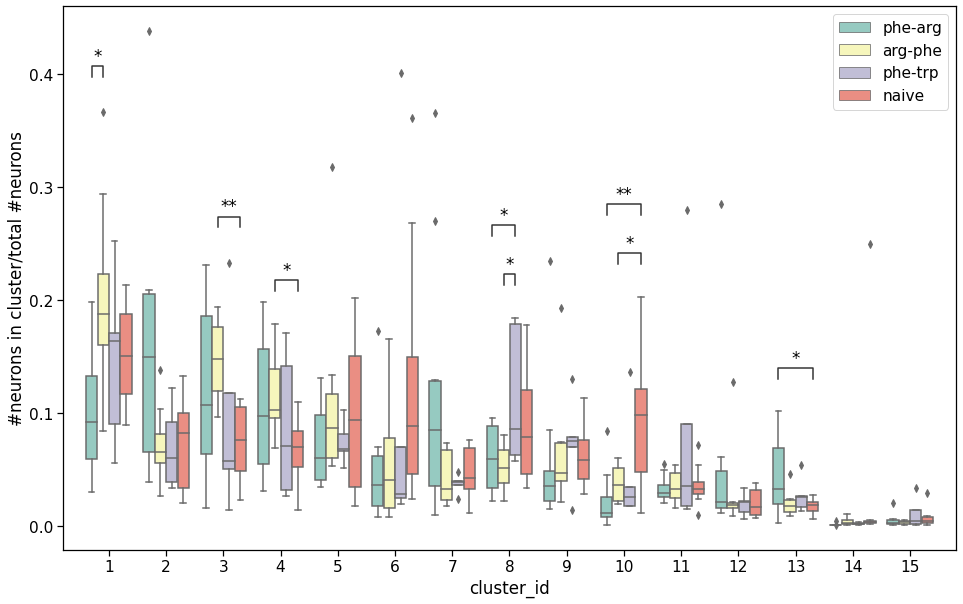

In [17]:
if compute_cluster_df:
    importlib.reload(caclust)
    from itertools import combinations
    labels = communities_raw


    n_clusters = len(np.unique(labels))
    cluster_df = pd.DataFrame(labels.reshape(1,-1), columns=all_response.columns)
    cluster_df = cluster_df.transpose().rename(columns={0:'cluster_id'}).reset_index()
    cluster_df['train_cond']= cluster_df['fish_id'].map(training_dict)
    cluster_count_df = cluster_df.groupby('train_cond', sort=False).cluster_id.value_counts(normalize=True).sort_index().reindex(dtpar.cond_list, level='train_cond')
    cluster_count_df

    cond_pair = list(combinations(dtpar.cond_list, 2))
    all_pairs = []

    for cluster_id in range(1, n_clusters+1):
        all_pairs.extend([[(cluster_id, x[0]), (cluster_id, x[1])] for x in cond_pair])
    
    cluster_df = pd.DataFrame(labels.reshape(1,-1), columns=all_response.columns)
    cluster_df = cluster_df.transpose().rename(columns={0:'cluster_id'}).reset_index()
    cluster_df['train_cond']= cluster_df['fish_id'].map(training_dict)
    cond_list = ['phe-arg', 'arg-phe', 'phe-trp', 'naive']

    grouped_cluster_id = cluster_df.groupby(['fish_id','train_cond'], sort=False).cluster_id
    cluster_count_df = grouped_cluster_id.value_counts(normalize=True).sort_index().reindex(cond_list, level='train_cond')

    cluster_count_df = cluster_count_df.rename('ratio').reset_index()
    cluster_count_df

    annotator, fig1 = caclust.plot_cluster_cont_with_stat(cluster_count_df, all_pairs, cond_list)

    new_pairs = caclust.get_significant_pairs(annotator)
    new_pairs

    annotator2, fig2 = caclust.plot_cluster_cont_with_stat(cluster_count_df, new_pairs, cond_list)
    fig2.savefig(os.path.join(fig_dir, "cluster_cont.svg"))

In [18]:
cluster_df

,fish_id,cond,plane,neuron,cluster_id,train_cond
0,2021-02-05-DpOBEM-JH9,phe-arg,0,5,1,phe-arg
1,2021-02-05-DpOBEM-JH9,phe-arg,0,8,13,phe-arg
2,2021-02-05-DpOBEM-JH9,phe-arg,0,11,10,phe-arg
3,2021-02-05-DpOBEM-JH9,phe-arg,0,12,7,phe-arg
4,2021-02-05-DpOBEM-JH9,phe-arg,0,16,8,phe-arg
...,...,...,...,...,...,...
28309,2022-02-20-DpOBEM-N11,naive,3,239,2,naive
28310,2022-02-20-DpOBEM-N11,naive,3,240,7,naive
28311,2022-02-20-DpOBEM-N11,naive,3,241,10,naive
28312,2022-02-20-DpOBEM-N11,naive,3,242,9,naive


In [17]:
if compute_cluster_df:
    cluster_df.to_pickle(os.path.join(dtpar.db_dir, 'cluster_df_{}.pkl'.format(region)))

In [8]:
cluster_df = pd.read_pickle(os.path.join(dtpar.db_dir, 'cluster_df_{}.pkl'.format(region)))

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

7_phe-trp vs. 7_naive: t-test independent samples, P_val:4.240e-01 t=8.304e-01
12_phe-arg vs. 12_arg-phe: t-test independent samples, P_val:2.666e-01 t=-1.154e+00
12_phe-trp vs. 12_naive: t-test independent samples, P_val:2.125e-01 t=-1.324e+00
5_phe-trp vs. 5_naive: t-test independent samples, P_val:4.318e-01 t=8.160e-01
7_phe-arg vs. 7_arg-phe: t-test independent samples, P_val:6.601e-01 t=4.481e-01
3_phe-trp vs. 3_naive: t-test independent samples, P_val:5.424e-01 t=6.286e-01
3_phe-arg vs. 3_arg-phe: t-test independent samples, P_val:4.922e-01 t=-7.029e-01
3_arg-phe vs. 3_phe-trp: t-test independent samples, P_val:1.639e-01 t=1.491e+00
5_phe-arg vs. 5_arg-phe: t-test independent samples, P_val:8.630e-01 t=-1.754e-01
5_arg-phe vs. 5_phe-trp: t-test independent samples, P_val:3.795e-01 t=9.156e-01
7_arg-phe

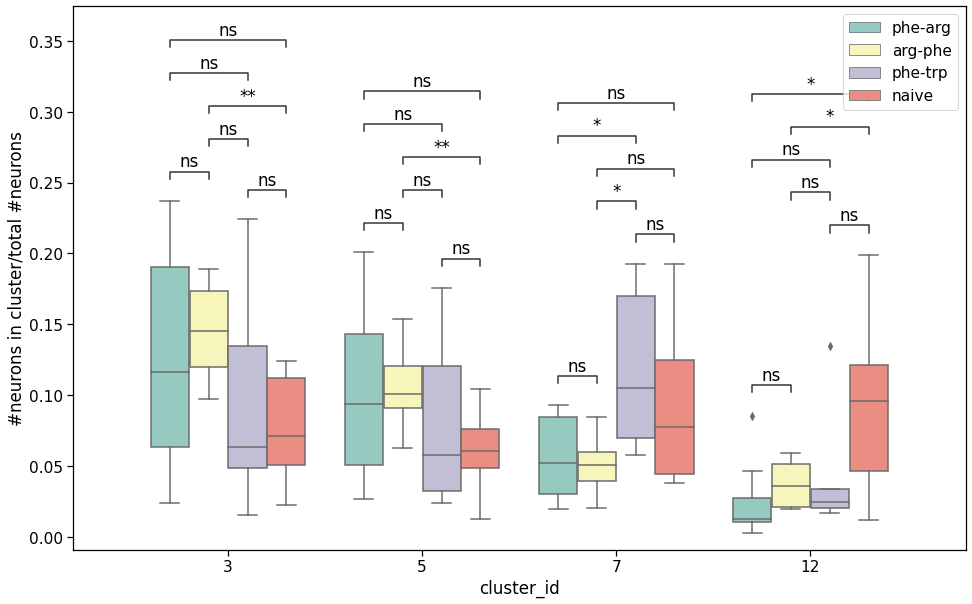

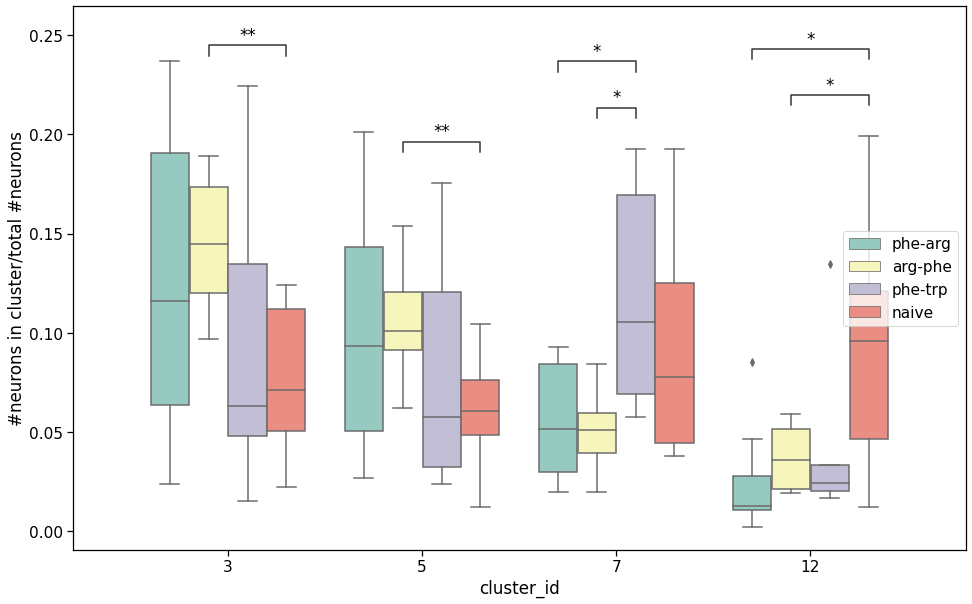

In [37]:
from itertools import combinations
cluster_count_df = cluster_df.groupby('train_cond', sort=False).cluster_id.value_counts(normalize=True).sort_index().reindex(dtpar.cond_list, level='train_cond')
cluster_count_df

cond_pair = list(combinations(dtpar.cond_list, 2))
all_pairs = []

#TODO n_clusters
n_clusters=15
cluster_ids = [3,5,7,12]

for cluster_id in cluster_ids:#range(1, n_clusters+1):
    all_pairs.extend([[(cluster_id, x[0]), (cluster_id, x[1])] for x in cond_pair])
    
cond_list = ['phe-arg', 'arg-phe', 'phe-trp', 'naive']

grouped_cluster_id = cluster_df.groupby(['fish_id','train_cond'], sort=False).cluster_id
cluster_count_df = grouped_cluster_id.value_counts(normalize=True).sort_index().reindex(cond_list, level='train_cond')

cluster_count_df = cluster_count_df.rename('ratio').reset_index()
cluster_count_df = cluster_count_df[cluster_count_df.cluster_id.isin(cluster_ids)] # choose subset of clusters for plotting

annotator, fig1 = caclust.plot_cluster_cont_with_stat(cluster_count_df, all_pairs, cond_list)

new_pairs = caclust.get_significant_pairs(annotator)
new_pairs

annotator2, fig2 = caclust.plot_cluster_cont_with_stat(cluster_count_df, new_pairs, cond_list)

fig2.savefig(os.path.join(fig_dir, f"cluster_cont_{region}_subset35712.svg"))

In [32]:
importlib.reload(dtpar)
from skimage.io import imsave
import catrace.nrn_coord as caroi
importlib.reload(caroi)
%matplotlib inline
data_root_dir = dtpar.data_root_dir
cluster_stack_dir = os.path.join(dtpar.analysis_dir, 'cluster_stack')
save_fig = True
for exp_name, cond in dtpar.exp_list:
    print(exp_name)
    exp_dir = os.path.join(data_root_dir, exp_name, region)
    stack_name = f'{region}_{exp_name}'
    meta_df = cluster_df.loc[cluster_df['fish_id'] == exp_name]
    mstack = caroi.map_meta_to_roi_stack(exp_dir, meta_df, 'cluster_id')
    # np.save(mstack, os.path.join(cluster_stack_dir, 'stacks', '{region}_{expname}.npz'))
    imsave(os.path.join(cluster_stack_dir, 'stacks', f'{stack_name}.tif'), mstack)
    fig = caroi.plot_meta_stack(mstack, cluster_cmap, title=stack_name)
    if save_fig:
        fig.savefig(os.path.join(cluster_stack_dir, 'figures', f'{stack_name}.svg'))
    plt.close()

2021-02-05-DpOBEM-JH9
2021-03-18-DpOBEM-JH10
2021-03-19-DpOBEM-JH10
2021-04-02-DpOBEM-JH11
2021-04-03-DpOBEM-JH11
2021-05-01-DpOBEM-JH13
2021-05-22-DpOBEM-JH14
2021-07-15-DpOBEM-N2
2021-07-16-DpOBEM-N3
2021-07-30-DpOBEM-JH17
2021-07-31-DpOBEM-JH17
2021-09-02-DpOBEM-JH18
2021-09-03-DpOBEM-JH18
2021-09-04-DpOBEM-JH18
2021-09-15-DpOBEM-JH20
2021-09-17-DpOBEM-JH20
2021-09-18-DpOBEM-JH20
2021-09-29-DpOBEM-JH21
2021-10-01-DpOBEM-JH21
2021-10-02-DpOBEM-JH21
2021-11-10-DpOBEM-JH23
2021-11-14-DpOBEM-JH23
2021-11-24-DpOBEM-JH24
2021-11-27-DpOBEM-JH24
2021-11-26-DpOBEM-JH24
2021-12-10-DpOBEM-N4
2021-12-31-DpOBEM-N7
2022-01-23-DpOBEM-N8
2022-01-30-DpOBEM-N9
2022-02-13-DpOBEM-N10
2022-02-20-DpOBEM-N11


In [17]:
from skimage.io import imread
%matplotlib qt5
exp_name = '2021-07-31-DpOBEM-JH17'
stack_name = f'{region}_{exp_name}'
mstack = imread(os.path.join(cluster_stack_dir, 'stacks', f'{stack_name}.tif'))
fig = caroi.plot_meta_stack(mstack, cluster_cmap, title=stack_name)

In [ ]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(data)
embed_df_nn = caclust.get_embed_df(standard_embedding, communities_raw)

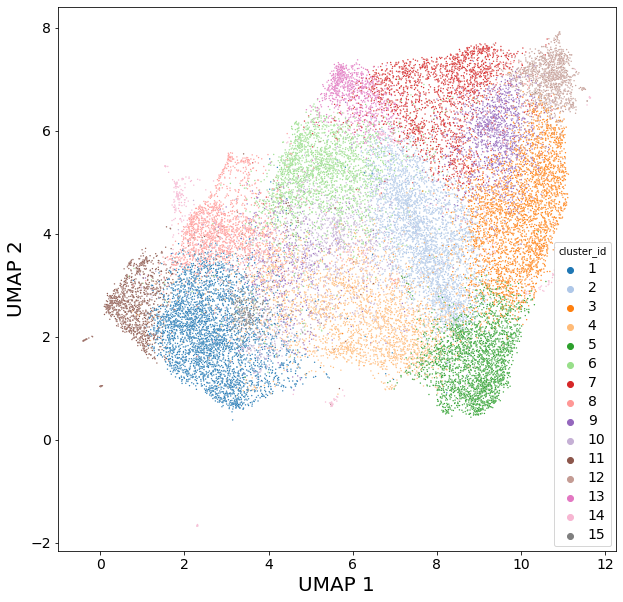

In [34]:
fig = caclust.plot_embed_df(embed_df_nn, cmap="tab20")
fig.savefig(os.path.join(fig_dir, "cluster_umap.png"))

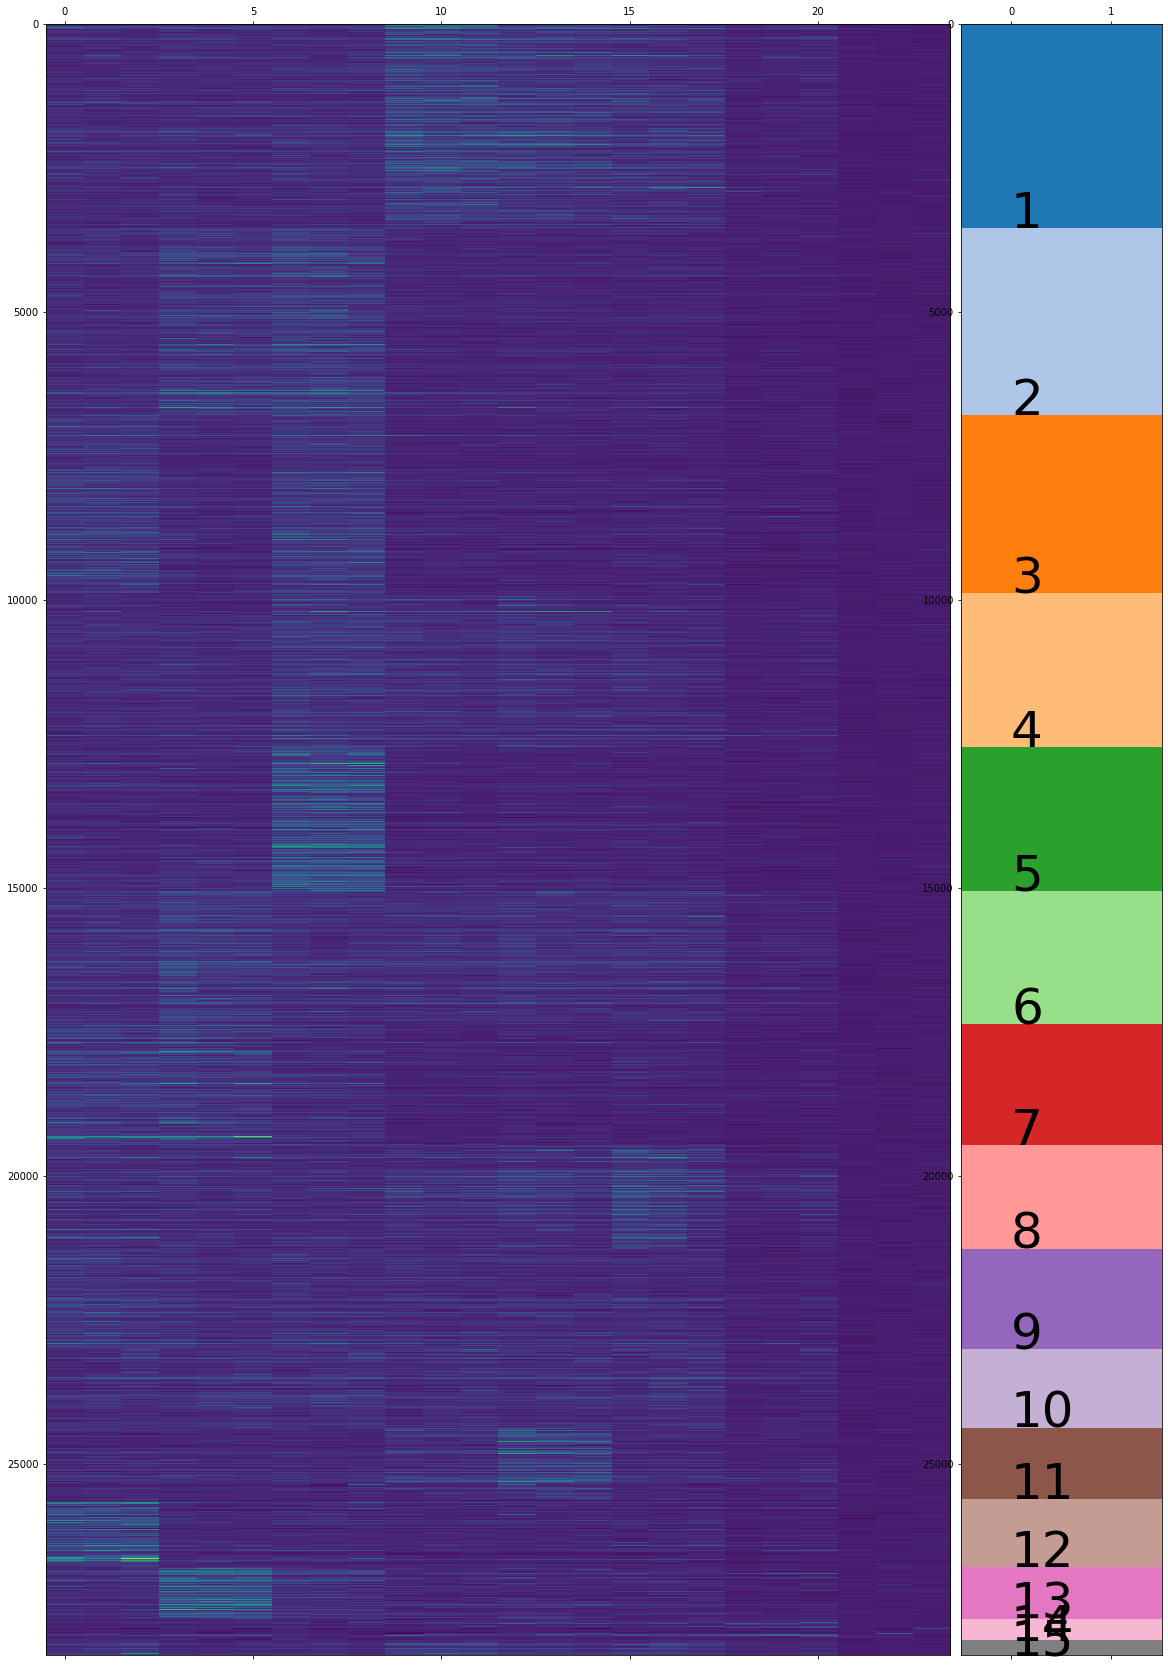

In [92]:
importlib.reload(caclust)
caclust.plot_clustered_heatmap(all_response, n_clusters, labels)

<AxesSubplot:xlabel='odor_trial', ylabel='response'>

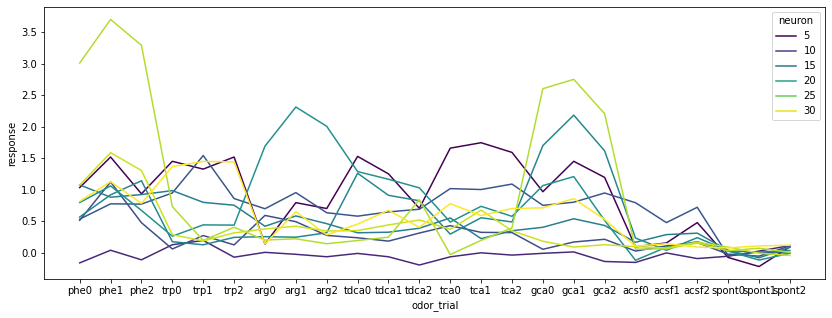

In [87]:
# plot some example tuning curves
tmpdf = all_response.iloc[:,:10]
tmpdf.columns = tmpdf.columns.droplevel(level=['fish_id', 'cond', 'plane'])
tmpdf = tmpdf.reset_index().melt(id_vars=['odor', 'trial'], value_name='response')
tmpdf['odor_trial'] = tmpdf['odor']+tmpdf['trial'].astype(str)
tmpdf
fig, ax = plt.subplots(figsize=(14,5))
sns.lineplot(data=tmpdf, x='odor_trial', y='response', hue='neuron',
             ax=ax, palette='viridis')

In [100]:
from scipy import sparse
sparse.save_npz(os.path.join(dtpar.db_dir, 'graph.npz'), graph)

In [98]:
graph

<28314x28314 sparse matrix of type '<class 'numpy.float64'>'
	with 1142769 stored elements in COOrdinate format>